In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
card = pd.read_excel('monthcard.xlsx', index_col = '이용월', parse_dates = True)

In [4]:
card.head(5)
card = card.rename(columns = {'카드결제건수(천건)' : '결제건수', '업종대분류' : '업종'})

In [5]:
card_2019.info()

NameError: name 'card_2019' is not defined

In [6]:
card_pivot = pd.pivot_table(card, index = '이용월', columns = '업종', values = '결제건수', aggfunc = 'mean')
card_pivot.head(3)

업종,FNB,가전/가구,문화여가,생활서비스,숙박,오프라인유통,온라인,의료,패션잡화
이용월,,,,,,,,,
201901,347090,12880,41940,107279,5744,461487,121064,79663,20389
201902,308327,11697,41582,96969,5247,423884,107620,65774,19591
201903,374317,14466,44887,109258,5207,512206,126282,78361,23718


In [7]:
card_pivot.index = pd.to_datetime(card_pivot.index, format = '%Y%m', errors = 'coerce')

In [8]:
card_pivot.to_period('m')
card_2019 = card_pivot.iloc[:12,]
card_2020 = card_pivot.iloc[12:24,]
card_2021 = card_pivot.iloc[24:,]

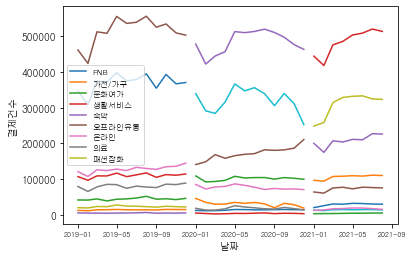

In [9]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.plot(card_2019)
plt.plot(card_2020)
plt.plot(card_2021)
plt.xlabel('날짜')
plt.xticks(fontsize = 7)
plt.ylabel('결제건수')
plt.legend(card_pivot.columns, loc = 'best', fontsize = 8)
plt.show()

In [10]:
new_card = pd.DataFrame(columns = card_pivot.columns[:], index = range(1,13,1))
for i in range(9):
    for j in range(12):
        new_card.iloc[j, i] = card_2020.iloc[j, i] - card_2019.iloc[j, i]
new_card
new_card_1 = pd.DataFrame(columns = card_pivot.columns[:], index = range(1,9,1))
for i in range(9):
    for j in range(8):
        new_card_1.iloc[j, i] = card_2021.iloc[j, i] - card_2020.iloc[j, i]
new_card_1

업종,FNB,가전/가구,문화여가,생활서비스,숙박,오프라인유통,온라인,의료,패션잡화
1,-90725,459,-25628,-12297,-1872,-33785,59325,-21074,-5847
2,-32831,371,-9507,2117,-104,-4062,26398,-11497,362
3,30185,2618,759,14055,1021,31256,38450,-2751,3717
4,13114,1891,-363,11522,1101,28866,45642,-2413,797
5,-34573,-661,-2721,1722,466,-9418,45627,-13820,-6391
6,-13998,-109,-594,5184,673,-1285,40574,-5095,-2807
7,-31392,594,-4440,6759,361,6776,55764,-1028,-2205
8,-16204,-333,-1001,5660,-178,-6335,44073,4479,-1678


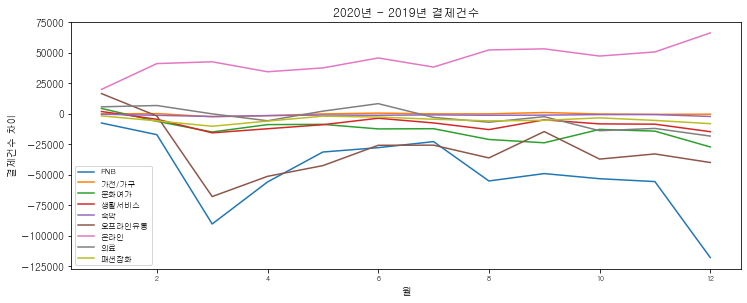

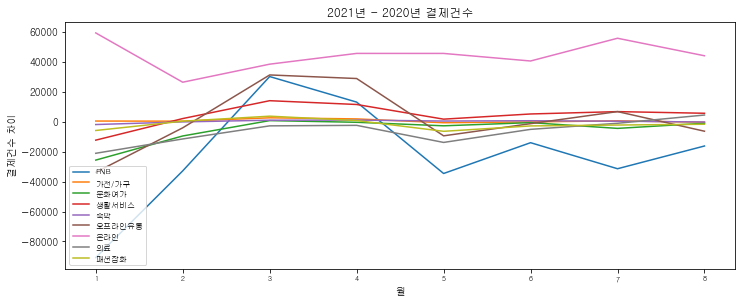

In [228]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.figure(figsize = (12,10))
plt.subplot(2,1,1)
plt.plot(new_card)
plt.title('2020년 - 2019년 결제건수')
plt.xlabel('월')
plt.xticks(fontsize = 7)
plt.ylabel('결제건수 차이')
plt.legend(card_pivot.columns, loc = 'lower left', fontsize = 8)
plt.show()
plt.figure(figsize = (12,10))
plt.subplot(2,1,2)

plt.plot(new_card_1)
plt.title('2021년 - 2020년 결제건수')
plt.xlabel('월')
plt.xticks(fontsize = 7)
plt.ylabel('결제건수 차이')
plt.legend(card_pivot.columns, loc = 'lower left', fontsize = 8)
plt.show()


In [216]:
card_2021

업종,FNB,가전/가구,문화여가,생활서비스,숙박,오프라인유통,온라인,의료,패션잡화
이용월,,,,,,,,,
2021-01-01,248766,13203,20629,96793,3484,444189,200324,64238,12778
2021-02-01,258348,12174,25856,94560,3852,417992,175078,61009,14098
2021-03-01,314248,14610,30699,107670,3972,475644,207253,75504,17196
2021-04-01,328803,14946,30020,108363,4407,485593,204139,77443,17909
2021-05-01,331876,14618,32507,109743,4860,503317,211389,73007,19514
2021-06-01,333045,14928,31897,108671,4875,508615,210216,77666,19345
2021-07-01,324626,14876,30609,111293,5276,519936,227237,76656,17788
2021-08-01,323250,14029,30077,110283,5485,513269,226223,75654,15624


In [11]:
df = pd.read_excel('df_case_clean_0508.xlsx', index_col = '보도일', parse_dates = True)

In [12]:
df = df.resample('M').sum()
df.drop(['1', '2', '3', '4', '5', 'folder'], axis = 1 , inplace = True);df
active_2020 = df[:12,]
active_2021 = df[12:24,]



InvalidIndexError: (slice(None, 12, None),)

In [13]:
active_2020 = df.iloc[:12,]
active_2021 = df.iloc[12:24,]


In [14]:
active_2020.index

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', name='보도일', freq='M')

In [15]:
active_2020.index = pd.to_datetime(active_2020.index, format = '%Y-%m', errors = 'coerce')
active_2021.index = pd.to_datetime(active_2021.index, format = '%Y-%m', errors = 'coerce')

In [16]:
active_2021.index 

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', name='보도일', freq='M')

In [17]:
df = df.resample('M').sum()

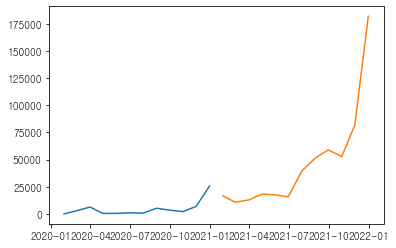

In [18]:
plt.plot(active_2020)
plt.plot(active_2021)
plt.show()

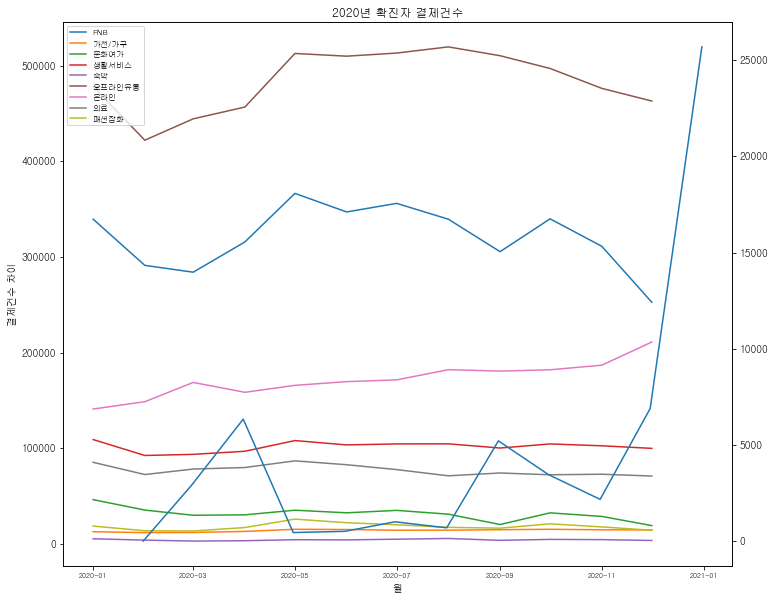

In [19]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.figure(figsize = (12,10))
plt.subplot(1,1,1)
plt.plot(card_2020)

plt.title('2020년 확진자 결제건수')
plt.xlabel('월')
plt.xticks(fontsize = 7)
plt.ylabel('결제건수 차이')
plt.legend(card_pivot.columns, loc = 'upper left', fontsize = 8)
plt.twinx()
plt.plot(active_2020)
plt.show()




In [53]:
a = card_group.mean(level = ['날짜']) 

C:\Users\kyeongtae\AppData\Local\Temp\ipykernel_9768\261407632.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  a = card_group.mean(level = ['날짜'])


In [77]:
a.index[244] # 2019년 9월 2일부터 2020년 1월 1일 전까지의 데이터 없음

20200101